*GRANGER M., LEVERS G. - 3A ESTACA*

# **Projet PIRATE 3A : Impact potentiel du Machine Learnung dans le traitement de données d'essais mécanique pour l'optimisation de structures**

L'objectif de ce Notebook est de tester différents modèles de ML pour de la classification d'éprouvettes en fonction de leur module de flexion calculé à partir d'un essai de flexion en 3 points (Norme NF EN ISO 14125).

Les modèles qui seront testés sont les suivants :
* SVR
* k-NN
* Random Forest


---


## **Traitement des données d'essais**

### **Chargement des données**

Les fichiers de données `.csv` utilisés ont été générés artificiellement par un scripte python suivant la norme *NF EN ISO 14125*, en y introduisant du bruit.

Nous chargeons les données de simulation vers un dataframe python pour pouvoir les analyser, puis les manipuler.

In [112]:
import pandas as pd

df = pd.read_csv('data/simulation_flexion3pts_final.csv')
print('Données chargées.')

Données chargées.


### **Analyse des données**

Nous choisissons d'afficher les valeurs des modules d'Young de chaque éprouvette afin d'avoir une idée de la répartition graphique.

Afin de s'intéresser à la densité de nos points dans certaines zones, nous choisissons un diagramme en violon.

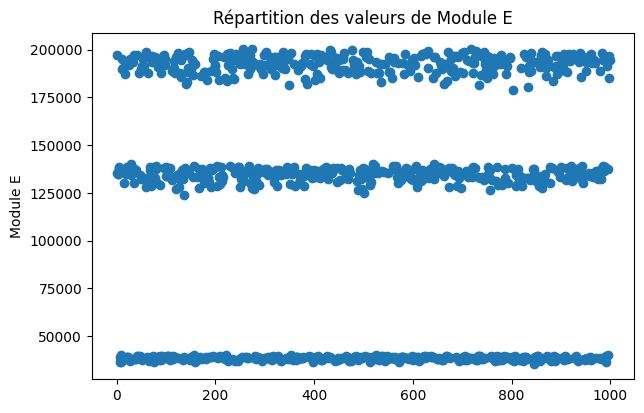

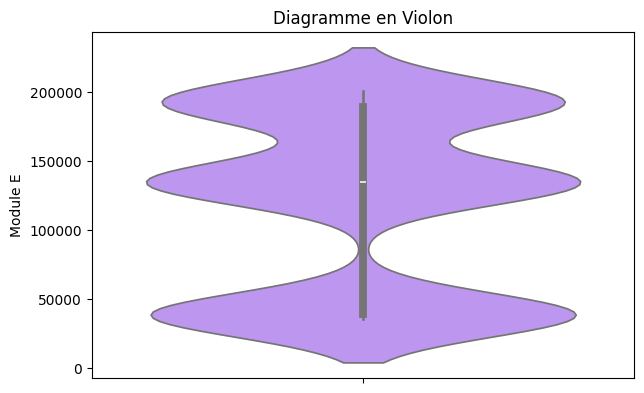

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

#--- Répartition graphique ---
plt.figure(figsize=(7, 4.5))
plt.scatter(df.index, df['Module E'])
plt.title('Répartition des valeurs de Module E')
plt.ylabel('Module E')
plt.show()

#--- Diagramme en violon (densité) ---
plt.figure(figsize=(7, 4.5))
sns.violinplot(y=df['Module E'], color='#BB87FF')
plt.title('Diagramme en Violon')
plt.show()

Comme nous le voyons sur le premier graphique, et illustré sur le second, il y a trois zones distinctes de module d'Young.


1.   Pic du haut : zone où les éprouvette seront considérées comme **parfaites**.

2.   Pic du milieu : zone où les éprouvettes seront considérées comme **acceptables**.

3.   Pic du bas : zone où les éprouvettes seront considérées comme **à jeter**.

### **Analyse du dataframe**

Notre dataframe contient différentes variables provenant des caractéristiques géométriques de l'éprouvette, des conditions de l'essais et des efforts appliqués.

In [114]:
#--- Informations sur les variables ---
print('Informations sur les variables :')
df.info()

#--- Description du dataframe ---
print('\nDescription du dataframe :')
display(df.describe())

#--- Affichage des premières et dernières lignes du dataframe ---
print('\nAffichage des premières lignes du dataframe:')
display(df.head())
print('\nAffichage des dernières lignes du dataframe:')
display(df.tail())

Informations sur les variables :
<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Largeur eprouvette    1000 non-null   float64
 1   Epaisseur             1000 non-null   float64
 2   Distance inter-appui  1000 non-null   int64  
 3   epsilon1              1000 non-null   float64
 4   epsilon2              1000 non-null   float64
 5   delta1                1000 non-null   float64
 6   delta2                1000 non-null   float64
 7   effort1               1000 non-null   float64
 8   effort2               1000 non-null   float64
 9   sigma1                1000 non-null   float64
 10  sigma2                1000 non-null   float64
 11  Module E              1000 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 93.9 KB

Description du dataframe :


,Largeur eprouvette,Epaisseur,Distance inter-appui,epsilon1,epsilon2,delta1,delta2,effort1,effort2,sigma1,sigma2,Module E
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.005180,1.253233,27.038000,5.000000e-04,0.0025,0.049387,0.246933,5.819358,64.012936,24.337153,267.708682,121685.764665
std,0.562914,0.140086,1.425689,2.169489e-19,0.0000,0.007791,0.038957,3.565265,39.217910,12.661912,139.281031,63309.559581
min,5.000053,1.000285,25.000000,5.000000e-04,0.0025,0.034805,0.174024,0.873395,9.607340,7.128453,78.412987,35642.266896
25%,5.504522,1.134361,26.000000,5.000000e-04,0.0025,0.043611,0.218055,2.129789,23.427683,7.827428,86.101703,39137.137765
50%,6.016675,1.255681,27.000000,5.000000e-04,0.0025,0.048411,0.242057,5.773823,63.512048,26.986881,296.855696,134934.407294
75%,6.479476,1.370230,28.000000,5.000000e-04,0.0025,0.055032,0.275162,8.357433,91.931762,37.852192,416.374110,189260.959108
max,6.999488,1.499880,29.000000,5.000000e-04,0.0025,0.070063,0.350317,16.719551,183.915059,40.130327,441.433602,200651.637357



Affichage des premières lignes du dataframe:


,Largeur eprouvette,Epaisseur,Distance inter-appui,epsilon1,epsilon2,delta1,delta2,effort1,effort2,sigma1,sigma2,Module E
0,5.595950,1.469928,26,0.0005,0.0025,0.038324,0.191619,12.242215,134.664369,39.487440,434.361842,197437.200817
1,5.396973,1.383183,29,0.0005,0.0025,0.050668,0.253341,6.433319,70.766504,27.102821,298.131026,135514.102777
2,6.340305,1.144316,25,0.0005,0.0025,0.045515,0.227574,5.963788,65.601668,26.937114,296.308252,134685.568885
3,5.194558,1.307856,26,0.0005,0.0025,0.043073,0.215365,6.152821,67.681035,27.006621,297.072834,135033.106143
4,5.945962,1.431924,25,0.0005,0.0025,0.036373,0.181865,9.012970,99.142665,27.722801,304.950807,138614.003250



Affichage des dernières lignes du dataframe:


,Largeur eprouvette,Epaisseur,Distance inter-appui,epsilon1,epsilon2,delta1,delta2,effort1,effort2,sigma1,sigma2,Module E
995,6.348284,1.308966,25,0.0005,0.0025,0.039790,0.198948,7.982368,87.806044,27.520104,302.721144,137600.519853
996,6.847359,1.484262,26,0.0005,0.0025,0.037954,0.189769,3.093274,34.026014,7.997220,87.969418,39986.099125
997,5.441066,1.058387,26,0.0005,0.0025,0.053226,0.266128,5.784872,63.633594,37.015645,407.172091,185078.223270
998,5.915236,1.462539,29,0.0005,0.0025,0.047919,0.239595,11.437548,125.813033,39.321945,432.541395,196609.725014
999,6.950896,1.163577,25,0.0005,0.0025,0.044761,0.223807,9.761249,107.373744,38.896031,427.856345,194480.156729


## **Valeur de référence et seuils**

La valeur de référence utilisée pour la construction des données d'essais est un module d'Young de valeur $E = 210\ 000 \text{MPa}$ (correspondant au module d'Young d'un acier). Nous prendrons donc cette valeur pour référence.

In [115]:
module_ref = 210000

Pour la suite nous définissons des seuils pour la classification de nos modules d'Young :

*   $0.80 \times E_{ref} < E$ : l'éprouvette est classé dans la catégorie "**Parfait**".

*   $0.50 \times E_{ref} < E < 0.80 \times E_{ref}$ : l'éprouvette est classée dans la catégorie "**Acceptable**".

*   $E < 0.50 \times E_{ref}$ : l'éprouvette est classée dans la catégorie "**À jeter**".

Nous créons ainsi une fonction d'étiquetage pour classer les modules de test, et par la suite les modules qui seront prédis.

In [116]:
#--- Création de la fonction d'étiquetage ---
def etiquetage(module) :

  ratio = module/module_ref

  if ratio >= 0.8 :
    return 'Parfait'

  elif 0.5 <= ratio < 0.8 :
    return 'Acceptable'

  else :
    return 'A jeter'

---

## **Choix des features et de la target**

### **Matrice de corrélation**

Notre dataframe possède de nombreuses variables, afin d'avoir une idée des meilleures à choisir comme *features* nous affichons la matrice de corrélation.




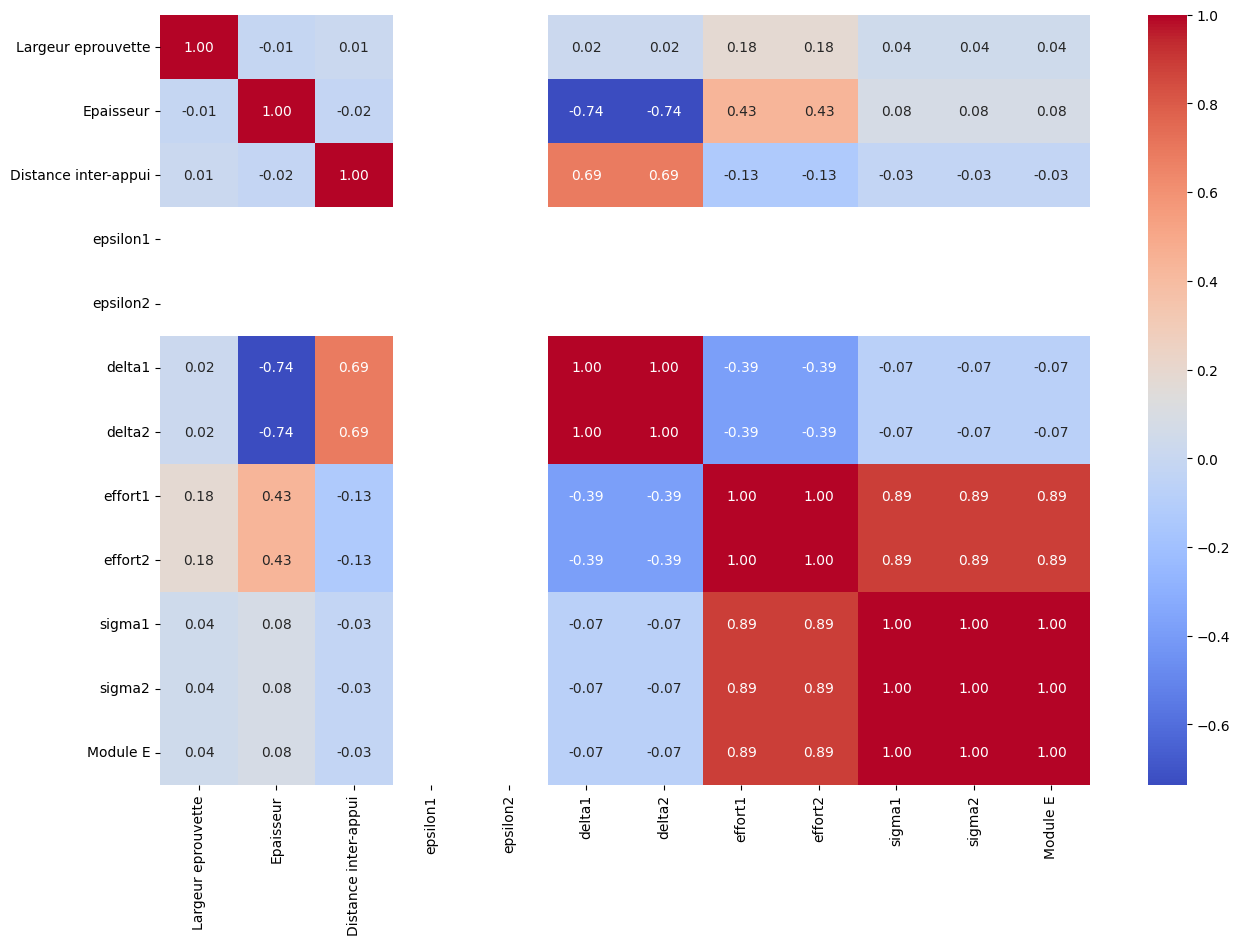

In [117]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

### **Définition des features**

Notre objectif ici est de permettre à l'utilisateur de réduire le nombre de variables nécessaires pour prédire un module d'Young avec précision.

Dans cette démarches les *features* retenues sont les suivantes :

*   Largeur de l'éprouvette
*   Épaisseur de l'éprouvette
*   Distance inter-appui
*   Delta2 (flèche)
*   Effort2 (effort appliqué)


In [118]:
X = df[['Largeur eprouvette',
        'Epaisseur',
        'Distance inter-appui',
        'delta2',
        'effort2']]

### **Définition de la target**

Notre objectif est de prédire le module d'Young de l'éprouvette, c'est donc notre target.

In [119]:
Y = df['Module E']

---
## **Définition des conditions d'entrainement**

### **Séparation entrainement/test**

Nous choisissons ici de donner 70% de nos données au modèle pour qu'il puisse s'entrainer, et 30% pour qu'il puisse se tester.

In [120]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

### **Création des pipelines**

Le pipeline permet de garantir que la normalisation soit ajustée uniquement sur les plis d'entrainement pendant la validation croisée.

In [121]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# --- SVR ---
pipeline_svr = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

#--- KNN ---
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

#--- RF ---
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

### **Définition de la grille d'hyperparamètres**

Dans notre objectif de trouver le meilleur modèle de ML pour notre cas, sur nos données, nous allons réaliser un `GridSearch` afin d'optimiser les paramètres du modèle. Nous définissons au préalable la grille des hyperparamètres à explorer et associer.



In [131]:
#--- SVR ---
param_grid_svr = {
    'svr__kernel': ['linear', 'rbf', 'poly'],
    'svr__C': [1000.0, 10000.0, 100000.0],           # Paramètre de régularisation
    'svr__epsilon': [0.0001, 0.001, 0.01],   # Marge de tolérance (tube)
    'svr__gamma': ['scale', 'auto', 0.1, 0.5, 1] # Coefficient pour les noyaux rbf/poly
}

#--- KNN ---
param_grid_knn = {
    'knn__n_neighbors': [2, 3, 4, 5, 7, 10, 15, 20, 30, 50],      # On va chercher un peu plus loin
    'knn__weights': ['uniform', 'distance'],            # Parfait tel quel
    'knn__p': [1, 2],                                   # Parfait tel quel
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree'], # On teste les arbres
    'knn__leaf_size': [10, 20, 30, 40]                      # Quelques tailles de feuilles
}

#--- RF ---
param_grid_rf = {
    'rf__n_estimators': [100, 200, 300, 500, 1000],          # 3 tailles de forêt
    'rf__max_depth': [None, 5, 10, 14, 15, 16, 20],              # On teste sans limite, et avec des limites
    'rf__min_samples_split': [2, 3, 5],              # On teste le défaut et un élagage léger
    'rf__min_samples_leaf': [1, 2, 3],               # Idem pour les feuilles finales
    'rf__max_features': ['sqrt', None]            # Un test avec toutes les colonnes, un test avec une racine carrée
}

---
## **Configuration et lancement de la recherche en grille**

Nous configurons la recherche en grille à l'aide du pipeline et de la grille d'hyperparamères, en choisissant une validation croisée à 5 plis et de minimiser l'erreur quadratique moyenne.

### **GridSearch : Support Vector Regression**

In [123]:
from sklearn.model_selection import GridSearchCV

#--- Configuration ---
gridsearch_svr = GridSearchCV(
    estimator=pipeline_svr,
    param_grid=param_grid_svr,
    cv=5,                              # Validation croisée à 5 plis
    scoring='neg_mean_squared_error',  # Optimiser pour réduire l'erreur quadratique moyenne
    n_jobs=-1,                         # Utiliser tous les cœurs du processeur
    verbose=1                          # Afficher la progression
)

#--- Lancement du GridSearch ---
print('Début GridSearch - SVR')
gridsearch_svr.fit(x_train, y_train)
print('Fin GridSearch - SVR')

#--- Affichage des résultats ---
print('\n--- Meilleur SVR ---')
print(f'Meilleurs paramètres : {gridsearch_svr.best_params_}')

Début GridSearch - SVR
Fitting 5 folds for each of 135 candidates, totalling 675 fits
Fin GridSearch - SVR

--- Meilleur SVR ---
Meilleurs paramètres : {'svr__C': 100000.0, 'svr__epsilon': 0.0001, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}


### **GridSearch : K-Nearest Neighbors**

In [124]:
#--- Configuration ---
gridsearch_knn = GridSearchCV(
    estimator=pipeline_knn,
    param_grid=param_grid_knn,
    cv=5,                              # Validation croisée à 5 plis
    scoring='neg_mean_squared_error',  # Optimiser pour réduire l'erreur quadratique moyenne
    n_jobs=-1,                         # Utiliser tous les cœurs du processeur
    verbose=1                          # Afficher la progression
)

#--- Lancement du GridSearch ---
print('Début GridSearch - KNN')
gridsearch_knn.fit(x_train, y_train)
print('Fin GridSearch - KNN')

#--- Affichage des résultats ---
print('\n--- Meilleur KNN ---')
print(f'Meilleurs paramètres : {gridsearch_knn.best_params_}')

Début GridSearch - KNN
Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Fin GridSearch - KNN

--- Meilleur KNN ---
Meilleurs paramètres : {'knn__algorithm': 'auto', 'knn__leaf_size': 10, 'knn__n_neighbors': 2, 'knn__p': 2, 'knn__weights': 'distance'}


### **GridSearch : Random Forest**

In [ ]:
#--- Configuration ---
gridsearch_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid_rf,
    cv=5,                              # Validation croisée à 5 plis
    scoring='neg_mean_squared_error',  # Optimiser pour réduire l'erreur quadratique moyenne
    n_jobs=-1,                         # Utiliser tous les cœurs du processeur
    verbose=1                          # Afficher la progression
)

#--- Lancement du GridSearch ---
print('Début GridSearch - RF')
gridsearch_rf.fit(x_train, y_train)
print('Fin GridSearch - RF')

#--- Affichage des résultats ---
print('\n--- Meilleur RF ---')
print(f'Meilleurs paramètres : {gridsearch_rf.best_params_}')

Début GridSearch - RF
Fitting 5 folds for each of 630 candidates, totalling 3150 fits


## **Création des modèles et entrainement**

Une fois les meilleurs hyperparamètres obtenus, nous pouvons créer le meilleur modèle avec. Grâce à la fonction `GridSearch`, le modèle est automatiquement réentrainé sur l'ensemble des données d'entrainement et prêt à l'emploi.



In [126]:
#--- SVR ---
best_svr = gridsearch_svr.best_estimator_
y_pred_svr = best_svr.predict(x_test)

#--- KNN ---
best_knn = gridsearch_knn.best_estimator_
y_pred_knn = best_knn.predict(x_test)

#--- RF ---
best_rf = gridsearch_rf.best_estimator_
y_pred_rf = best_rf.predict(x_test)

---

## **Analyse des performances**

### **Calcul des performances**

Nous choisissons de calculer la racine de l'erreur quadratique moyenne ($\text{RMSE}$) définie par :
$$\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

Nous choisissons aussi de calculer le coefficient de détermination ($\text{r²}$) défini par :
$$\text{r²}=1-\frac{ \sum_{i=1}^{N} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{N} (y_i - \bar{y})^2}$$


In [127]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

predictions = {
    "SVR": y_pred_svr,
    "KNN": y_pred_knn,
    "RF": y_pred_rf
}

for nom_modele, y_pred in predictions.items():
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"\n--- Modèle {nom_modele} ---")
    print(f"RMSE pour le {nom_modele} : {rmse:.4f}")
    print(f"R² pour le {nom_modele}   : {r2:.4f}")


--- Modèle SVR ---
RMSE pour le SVR : 1194.9090
R² pour le SVR   : 0.9997

--- Modèle KNN ---
RMSE pour le KNN : 8644.5194
R² pour le KNN   : 0.9821

--- Modèle RF ---
RMSE pour le RF : 7458.5012
R² pour le RF   : 0.9866


### **Comparaison entre les prédictions et de la réalité**

Nous traçons sur un même graphique les valeurs réelles et les valeurs prédites afin de visualiser graphiquement les erreurs.

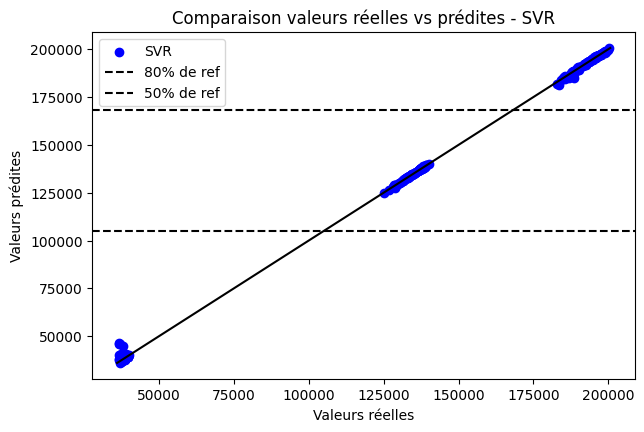

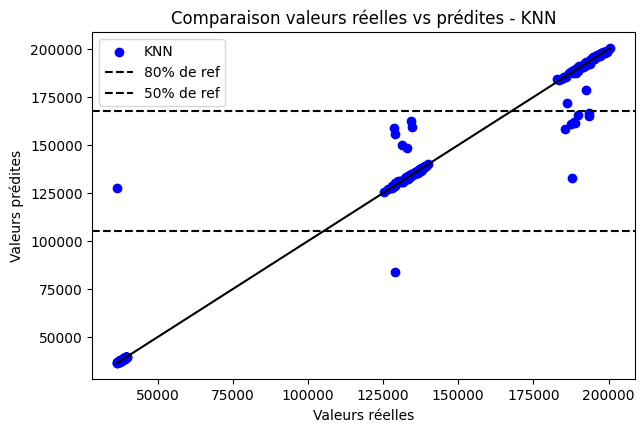

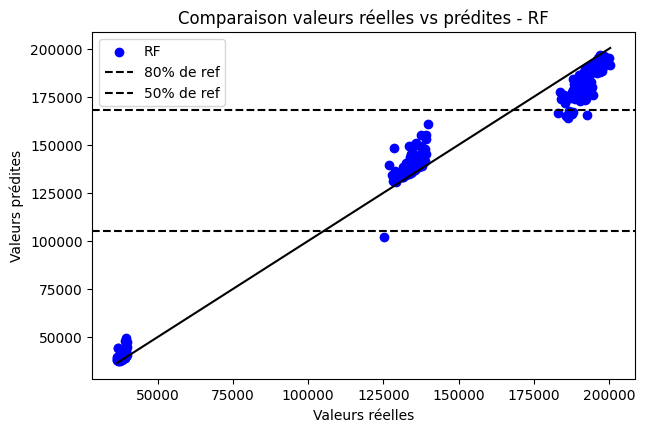

In [128]:
for nom_modele, y_pred in predictions.items():
    plt.figure(figsize=(7, 4.5))

    plt.scatter(y_test, y_pred, label=nom_modele, color='blue')

    # Ligne idéale y = x
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], color='black')

    #Affichage des différents seuils
    plt.axhline(0.8 * module_ref, linestyle='--', label="80% de ref", color='black')
    plt.axhline(0.5 * module_ref, linestyle='--', label="50% de ref", color='black')

    plt.xlabel("Valeurs réelles")
    plt.ylabel("Valeurs prédites")
    plt.title(f"Comparaison valeurs réelles vs prédites - {nom_modele}")

    plt.legend()
    plt.show()



### **Matrice de confusion**

Afin de mesurer plus clairement les performances de nos modèles dans l'objectif de classifier des éprouvettes, nous reconstruisons une matrice de confusion manuellement.

<Figure size 640x480 with 0 Axes>

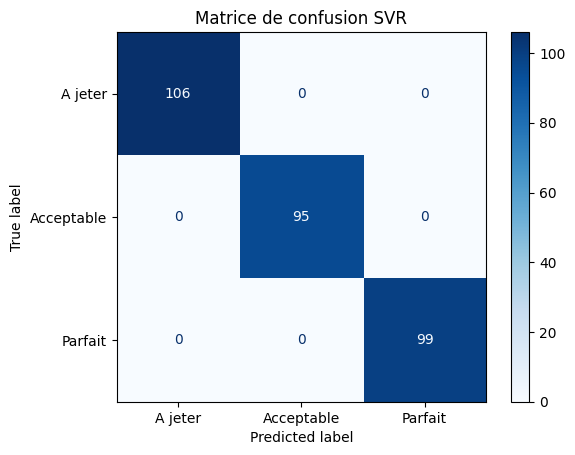

<Figure size 640x480 with 0 Axes>

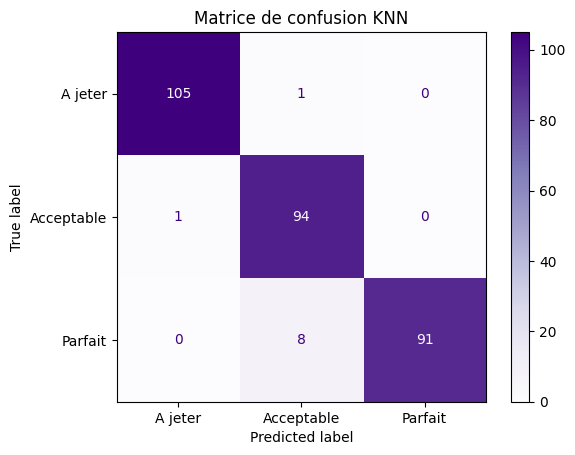

<Figure size 640x480 with 0 Axes>

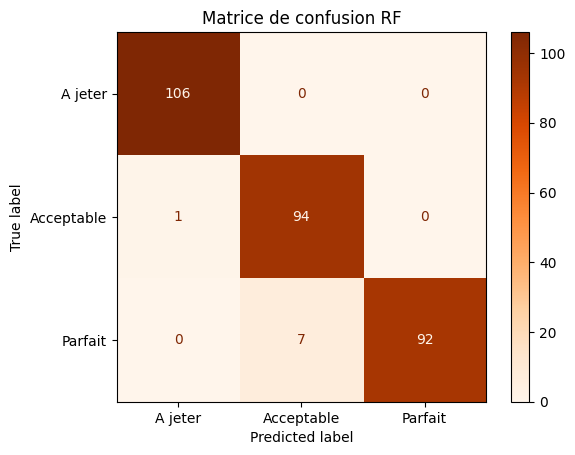

In [130]:
# --- Création des étiquettes pour les valeurs réelles ---
y_true_labels = [etiquetage(y) for y in y_test]

# --- Création des étiquettes pour les prédictions ---
predictions_labels = {}
for nom_modele, y_pred in predictions.items():
    y_pred_labels = [etiquetage(y) for y in y_pred]
    predictions_labels[nom_modele] = y_pred_labels

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

couleurs_modeles = {
    "SVR": "Blues",
    "KNN": "Purples",
    "RF": "Oranges"
}

#--- Matrices de confusion ---
for nom_modele, y_pred_labels in predictions_labels.items():
    plt.figure()
    cm = confusion_matrix(y_true_labels, y_pred_labels, labels=['A jeter', 'Acceptable', 'Parfait'])
    disp = ConfusionMatrixDisplay(cm, display_labels=['A jeter', 'Acceptable', 'Parfait'])
    disp.plot(cmap=couleurs_modeles[nom_modele])
    plt.title(f"Matrice de confusion {nom_modele}")
    plt.show()
